<a href="https://colab.research.google.com/github/ericcurtygiorno/Desafio_Tecnico_OnCase/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [846]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [847]:
df = pd.read_excel('/content/time_series_data.xlsx')

In [848]:
df = df[df.produto_descricao == 'B3']

In [849]:
df.dtypes

produto_descricao                          object
produto_quantidade                          int64
produto_unidade_comercial                  object
produto_valor_unitario_comercializacao    float64
nota_data_emissao                           int64
dtype: object

In [850]:
df.duplicated().sum()

141

In [851]:
df = df.drop_duplicates()

In [852]:
df = df[["nota_data_emissao", "produto_quantidade"]]
df.columns = ["date", "demand"]
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.groupby(by=['date']).agg({'demand': 'sum'}).reset_index()
df.set_index(df.date, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop("date", axis = 1, inplace = True)
df.head()

,demand
date,
2020-10-01,24
2020-10-02,40
2020-10-07,19
2020-10-09,48
2020-10-10,48


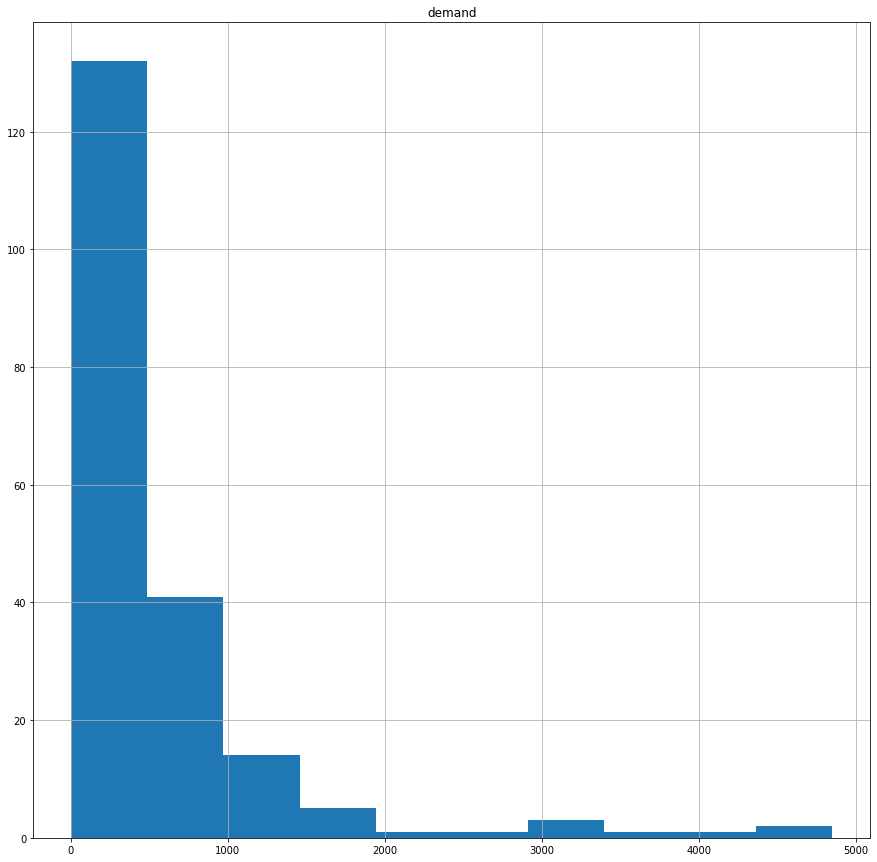

In [853]:
df.hist(figsize = (15, 15))
plt.show()

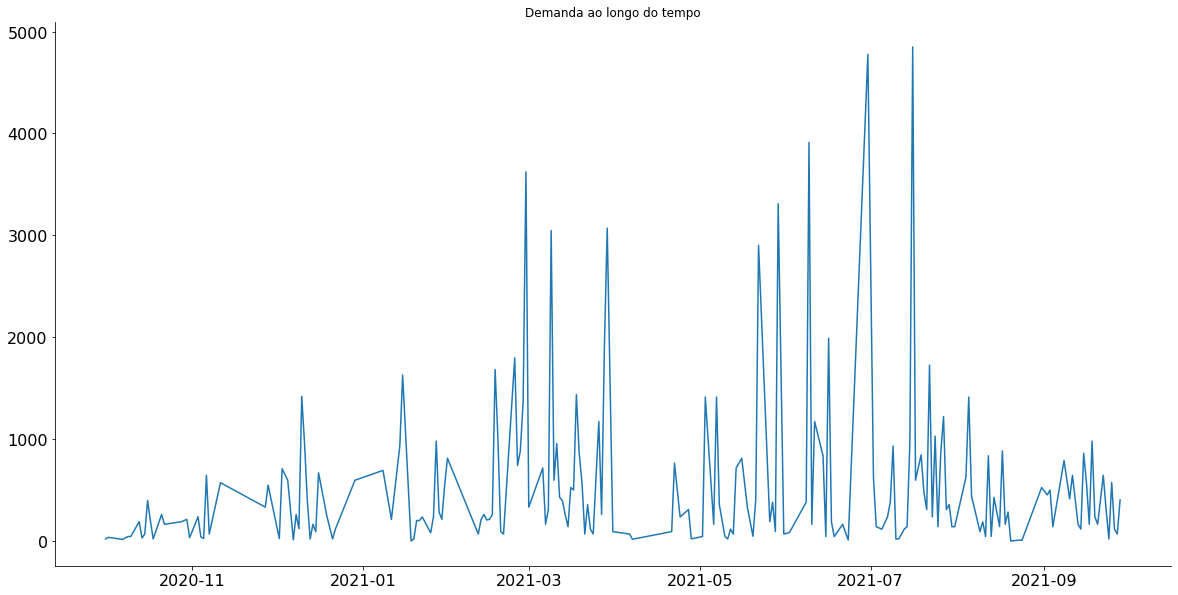

In [854]:
plt.figure(figsize = (20, 10))
ax = plt.subplot(111)
ax.plot(df.index, df.demand)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.title("Demanda ao longo do tempo")
plt.show()

In [855]:
# A média é 543 produtos e o desvio padrão de 780.
# A demanda mínima foram 3 produtos.
# A demanda máxima foram 4849 produtos.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
demand,201.0,543.248756,780.440188,3.0,96.0,264.0,648.0,4849.0


In [856]:
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [857]:
params = [
(2, 1, 1),
(3, 1, 1),
(4, 1, 1),
(5, 1, 1),
(2, 1, 2),
(3, 1, 2),
(4, 1, 3),
(5, 1, 3),
(1, 1, 4),
(2, 1, 4),
(3, 1, 4),
(4, 1, 4),
(5, 1, 4),
(10, 1, 1)
]
 
for param in params:
   try:
      model = ARIMA(df.demand, order = param).fit()
      acc = mape(df.demand, model.predict(typ = "levels"))
      print("Order: ", param, "MAPE:", acc)
   except: 
      pass

Order:  (2, 1, 1) MAPE: 527.2877866229014
Order:  (3, 1, 1) MAPE: 513.7330533673071
Order:  (4, 1, 1) MAPE: 512.8291414829117
Order:  (5, 1, 1) MAPE: 516.6645841440989
Order:  (2, 1, 2) MAPE: 519.0764494988978
Order:  (3, 1, 2) MAPE: 513.3654296742174
Order:  (4, 1, 3) MAPE: 518.9046109139232
Order:  (2, 1, 4) MAPE: 525.6814149661329
Order:  (3, 1, 4) MAPE: 526.3101101101408
Order:  (4, 1, 4) MAPE: 521.6279855515689


In [858]:
model = ARIMA(df.demand, order = (4, 1, 1)).fit()
acc = mape(df.demand, model.predict(typ = "levels"))
print("Mean Absolute Percentage Error: ", acc)

Mean Absolute Percentage Error:  512.8291414829117


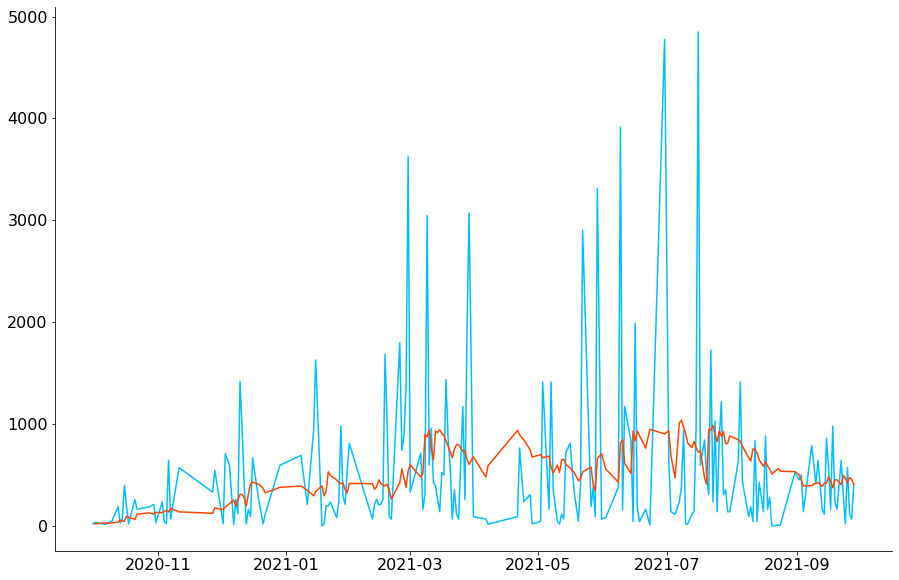

In [859]:
fig, ax = plt.subplots(figsize = (15, 10))
actual = ax.plot(df.demand, color = "deepskyblue")
pred = ax.plot(model.predict(typ = "levels"), color = "orangered")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)

 
plt.show()

## Demanda pelo produto B3 nos próximos dias

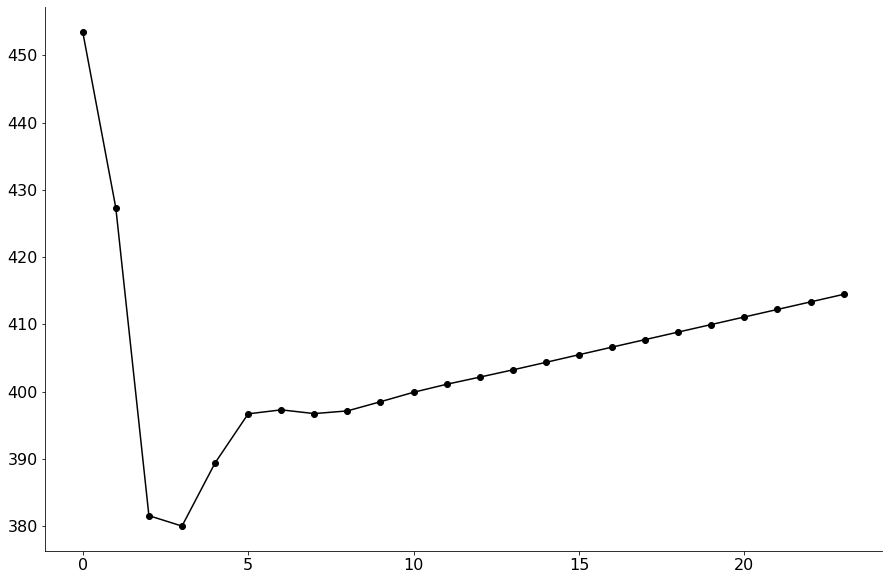

In [868]:
forecasting = model.forecast(24, alpha = 0.05)[0]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(forecasting, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.show()